#Importing modules (libraries) and loading data

In [2]:
#To be installed:
'''
!pip install xgboost
!pip install lightgbm
!pip install catboost     
'''

'\n!pip install xgboost\n!pip install lightgbm\n!pip install catboost     \n'

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import roc_auc_score, accuracy_score, f1_score

from sklearn.utils import resample

In [4]:
!git clone https://github.com/josefstrnad/Employ_ret_rating

Cloning into 'Employ_ret_rating'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), 252.00 KiB | 2.12 MiB/s, done.


In [5]:
df = pd.read_csv(f"/content/Employ_ret_rating/assignment_data.csv")

In [6]:
#df = pd.read_csv('assignment_data.csv')

#EDA

In [7]:
df.shape

(4941, 9)

In [8]:
df.head()

,id,left_employee_flag,age_years,tenure_below_1yr_flag,manager_flag,climate,climate_change,question 21,question 23
0,1,Leaving employees,42.0,0,0,76.0,NaN,73.0,NaN
1,2,Staying employees,32.0,0,0,83.3,10.0,85.0,NaN
2,3,Staying employees,35.0,0,0,100.0,0.0,80.0,100.0
3,4,Leaving employees,30.0,1,0,87.5,NaN,NaN,80.0
4,5,Staying employees,64.0,0,0,89.7,6.3,100.0,100.0


In [9]:
# Rename the columns
df = df.rename(columns={'question 21': 'question_21', 'question 23': 'question_23'})

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4941 entries, 0 to 4940
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4941 non-null   int64  
 1   left_employee_flag     4941 non-null   object 
 2   age_years              4939 non-null   float64
 3   tenure_below_1yr_flag  4941 non-null   int64  
 4   manager_flag           4941 non-null   int64  
 5   climate                4904 non-null   float64
 6   climate_change         3296 non-null   float64
 7   question_21            2775 non-null   float64
 8   question_23            3314 non-null   float64
dtypes: float64(5), int64(3), object(1)
memory usage: 347.5+ KB


In [11]:
df.describe()

,id,age_years,tenure_below_1yr_flag,manager_flag,climate,climate_change,question_21,question_23
count,4941.00000,4939.000000,4941.000000,4941.000000,4904.000000,3296.000000,2775.000000,3314.000000
mean,2471.00000,38.066005,0.167173,0.060312,78.607769,2.268113,69.800396,89.452625
std,1426.48817,10.461607,0.373168,0.238087,22.879436,17.457116,32.543942,20.886825
min,1.00000,6.000000,0.000000,0.000000,0.000000,-99.500000,0.000000,0.000000
25%,1236.00000,30.000000,0.000000,0.000000,67.975000,-3.300000,50.000000,88.000000
50%,2471.00000,37.000000,0.000000,0.000000,85.000000,0.000000,80.000000,100.000000
75%,3706.00000,45.000000,0.000000,0.000000,97.700000,9.000000,100.000000,100.000000
max,4941.00000,122.000000,1.000000,1.000000,100.000000,100.000000,100.000000,100.000000


In [12]:
df.isna().sum()

id                          0
left_employee_flag          0
age_years                   2
tenure_below_1yr_flag       0
manager_flag                0
climate                    37
climate_change           1645
question_21              2166
question_23              1627
dtype: int64

In [13]:
#Check the balance of the data in column
df.left_employee_flag.value_counts()

Staying employees    4062
Leaving employees     879
Name: left_employee_flag, dtype: int64

In [14]:
#Check the balance of the data in column
df.tenure_below_1yr_flag.value_counts()

0    4115
1     826
Name: tenure_below_1yr_flag, dtype: int64

In [15]:
#Check the balance of the data in column
df.manager_flag.value_counts()

0    4643
1     298
Name: manager_flag, dtype: int64

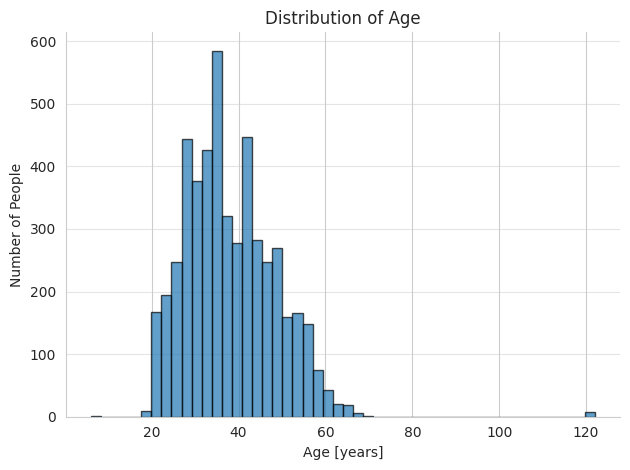

In [16]:
df_age_years = df['age_years']

sns.set_style('whitegrid')

plt.hist(df_age_years, bins=50, edgecolor='black', alpha=0.7)

plt.xlabel('Age [years]')
plt.ylabel('Number of People')
plt.title('Distribution of Age')

plt.grid(axis='y', alpha=0.5)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

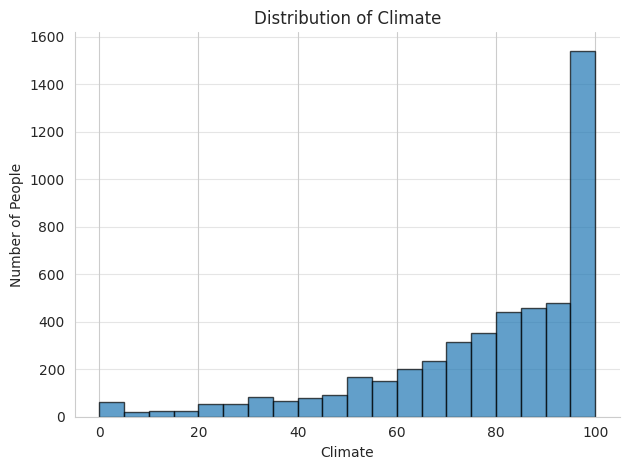

In [17]:
df_climate = df['climate']

sns.set_style('whitegrid')

plt.hist(df_climate, bins=20, edgecolor='black', alpha=0.7)

plt.xlabel('Climate')
plt.ylabel('Number of People')
plt.title('Distribution of Climate')

plt.grid(axis='y', alpha=0.5)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

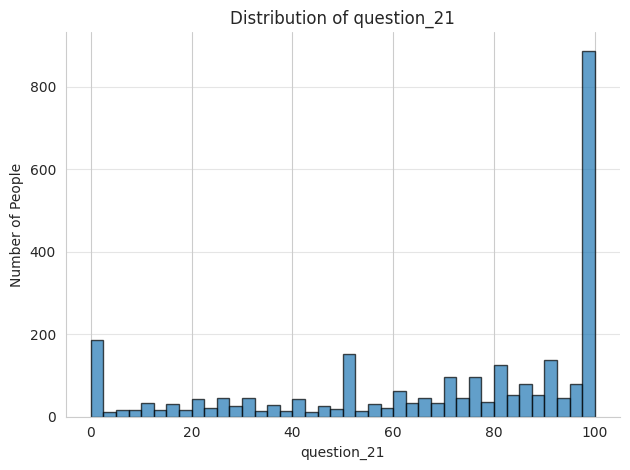

In [18]:
df_question_21 = df['question_21']

sns.set_style('whitegrid')

plt.hist(df_question_21, bins=40, edgecolor='black', alpha=0.7)

plt.xlabel('question_21')
plt.ylabel('Number of People')
plt.title('Distribution of question_21')

plt.grid(axis='y', alpha=0.5)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

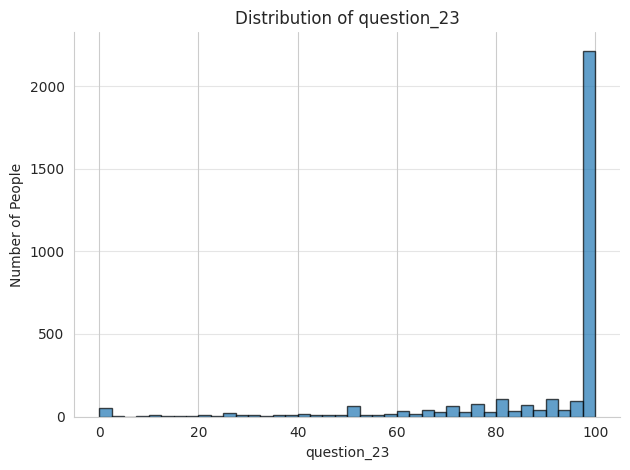

In [19]:
df_question_23 = df['question_23']

sns.set_style('whitegrid')

plt.hist(df_question_23, bins=40, edgecolor='black', alpha=0.7)

plt.xlabel('question_23')
plt.ylabel('Number of People')
plt.title('Distribution of question_23')

plt.grid(axis='y', alpha=0.5)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# Data preprocessing

In [20]:
df = df.replace(to_replace={'Staying employees': 0, 'Leaving employees': 1})

In [21]:
df.head()

,id,left_employee_flag,age_years,tenure_below_1yr_flag,manager_flag,climate,climate_change,question_21,question_23
0,1,1,42.0,0,0,76.0,NaN,73.0,NaN
1,2,0,32.0,0,0,83.3,10.0,85.0,NaN
2,3,0,35.0,0,0,100.0,0.0,80.0,100.0
3,4,1,30.0,1,0,87.5,NaN,NaN,80.0
4,5,0,64.0,0,0,89.7,6.3,100.0,100.0


In [22]:
df.isna().sum()

id                          0
left_employee_flag          0
age_years                   2
tenure_below_1yr_flag       0
manager_flag                0
climate                    37
climate_change           1645
question_21              2166
question_23              1627
dtype: int64

In [23]:
# Fill NaN values by mean value
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer=imputer.fit(df.iloc[:,5:9])
df.iloc[:,5:9]=imputer.transform(df.iloc[:,5:9])

In [24]:
# Fill NaN values by most frequent value (age)
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputer=imputer.fit(df.iloc[:,2:3])
df.iloc[:,2:3]=imputer.transform(df.iloc[:,2:3])  

In [25]:
#Climate_actual calculation. I could be used, but has low significance in results.
df['climate_actual'] = df['climate'] + df['climate_change']

In [26]:
df = df.drop(['id'], axis=1)

In [27]:
X = df.drop(['left_employee_flag'], axis=1)
y = df.left_employee_flag

In [28]:
df.left_employee_flag.value_counts()

0    4062
1     879
Name: left_employee_flag, dtype: int64

In [29]:
df.corr(method='pearson')

,left_employee_flag,age_years,tenure_below_1yr_flag,manager_flag,climate,climate_change,question_21,question_23,climate_actual
left_employee_flag,1.000000,-0.153003,0.095106,-0.044491,-0.112814,-0.022206,-0.053417,-0.106604,-0.108552
age_years,-0.153003,1.000000,-0.232927,0.053814,0.040371,0.003069,0.078523,0.096580,0.036232
tenure_below_1yr_flag,0.095106,-0.232927,1.000000,-0.033760,0.077458,-0.024471,0.035095,0.006771,0.053248
manager_flag,-0.044491,0.053814,-0.033760,1.000000,0.060838,-0.011848,0.025099,0.029077,0.045773
climate,-0.112814,0.040371,0.077458,0.060838,1.000000,-0.023053,0.441101,0.436854,0.844382
climate_change,-0.022206,0.003069,-0.024471,-0.011848,-0.023053,1.000000,-0.005831,0.040343,0.516134
question_21,-0.053417,0.078523,0.035095,0.025099,0.441101,-0.005831,1.000000,0.348938,0.374782
question_23,-0.106604,0.096580,0.006771,0.029077,0.436854,0.040343,0.348938,1.000000,0.395888
climate_actual,-0.108552,0.036232,0.053248,0.045773,0.844382,0.516134,0.374782,0.395888,1.000000


<Axes: >

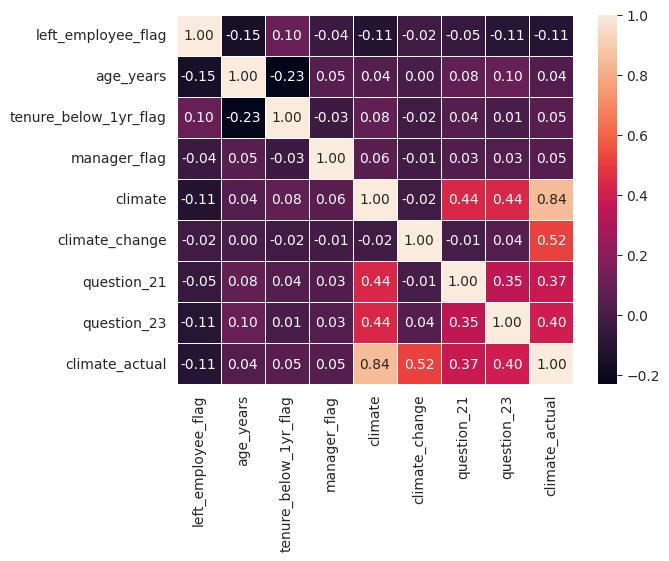

In [30]:
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", linewidth=.5)

# Preparing train and test data

In [31]:
X = df.drop(['left_employee_flag'], axis=1)
y = df.left_employee_flag

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, stratify=y)

In [33]:
# worse resuts with standardscaler
'''standardscaler = StandardScaler()
X_train = standardscaler.fit_transform(X_train)
X_test = standardscaler.transform(X_test)     '''

'standardscaler = StandardScaler()\nX_train = standardscaler.fit_transform(X_train)\nX_test = standardscaler.transform(X_test)     '

# Modelling - feature_importances

In [34]:
rf_classifier = RandomForestClassifier(n_estimators=125, criterion='entropy', random_state=42)

rf_classifier.fit(X, y)

importance_scores = rf_classifier.feature_importances_

sorted_indices = np.argsort(importance_scores)[::-1]
sorted_features = X.columns[sorted_indices]
sorted_scores = importance_scores[sorted_indices]
print(sorted_scores)

[0.22889192 0.19771487 0.17934422 0.17287966 0.10769416 0.08207754
 0.02064921 0.01074842]


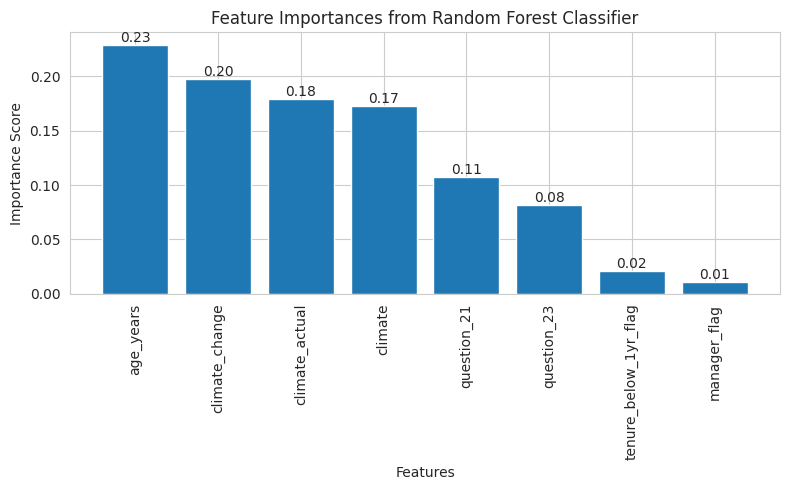

In [35]:
plt.figure(figsize=(8, 5))
plt.bar(range(len(sorted_features)), sorted_scores, tick_label=sorted_features)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importances from Random Forest Classifier')

for i, score in enumerate(sorted_scores):
    plt.text(i, score, f'{score:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Modelling - all algos together (imbalanced data)

In [36]:
base_model = [
    DecisionTreeClassifier(max_depth=4, criterion='entropy', class_weight='balanced', random_state=42),                
    RandomForestClassifier(n_estimators=125, criterion='entropy', class_weight='balanced', random_state=42),        
    AdaBoostClassifier(learning_rate=0.1, n_estimators=3000, random_state=42),     
    GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42),            
    XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42),
    CatBoostClassifier(learning_rate=0.1, depth=6, iterations=100, silent=True, random_state=42)
       
] 

In [37]:
#Do some preperation for the loop
col = []
algorithms = pd.DataFrame(columns = col)
idx = 0

#Train and score algorithms
for a in base_model:
    
    a.fit(X_train, y_train)
    pred = a.predict(X_test)
    acc_train = accuracy_score(y_train, a.predict(X_train)) 
    acc_test = accuracy_score(y_test, pred) 
    f1 = f1_score(y_test, pred)
    cv = cross_val_score(a, X_test, y_test).mean()
    auc = roc_auc_score(y_test, pred)
    
    Alg = a.__class__.__name__
    
    algorithms.loc[idx, 'Algorithm'] = Alg
    algorithms.loc[idx, 'Accuracy [train]'] = round(acc_train * 100, 2)
    algorithms.loc[idx, 'Accuracy [test]'] = round(acc_test * 100, 2)
    algorithms.loc[idx, 'F1 Score'] = round(f1 * 100, 2)
    algorithms.loc[idx, 'CV Score'] = round(cv * 100, 2)
    algorithms.loc[idx, 'AUC Score'] = round(auc * 100, 2)

    idx+=1

In [38]:
algorithms.sort_values(by='AUC Score', ascending=False)

,Algorithm,Accuracy [train],Accuracy [test],F1 Score,CV Score,AUC Score
0,DecisionTreeClassifier,74.67,74.52,51.16,73.81,74.71
4,XGBClassifier,84.89,82.81,30.89,82.81,58.83
3,GradientBoostingClassifier,85.43,82.71,30.77,83.22,58.77
2,AdaBoostClassifier,84.31,82.31,30.28,82.20,58.52
1,RandomForestClassifier,97.93,79.58,30.34,81.80,58.19
5,CatBoostClassifier,84.11,82.81,25.44,83.21,56.82


# Modelling - all algos together (balanced data)

In [39]:
models = [
    DecisionTreeClassifier(class_weight='balanced', random_state=42),                
    RandomForestClassifier(class_weight='balanced', random_state=42),        
    AdaBoostClassifier(learning_rate=0.1, n_estimators=3000, random_state=42),     
    GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42),            
    XGBClassifier(random_state=42),
    CatBoostClassifier(silent=True, random_state=42)
       
] 

In [40]:
# Separate the majority and minority classes
majority_class = df[df['left_employee_flag'] == 0]
minority_class = df[df['left_employee_flag'] == 1]

# Upsample the minority class to address class imbalance
minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

# Combine the upsampled minority class with the majority class
df_balanced = pd.concat([majority_class, minority_upsampled])

# Extract the features and target variable from the balanced dataframe
X = df_balanced[['age_years', 'tenure_below_1yr_flag', 'manager_flag', 'climate', 'climate_change', 'question_21', 'question_23']]
y = df_balanced['left_employee_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

results = []

for model in models:
    # Train the classifier on the balanced training data
    model.fit(X_train, y_train)

    # Predict the labels for the training and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate accuracy and F1 score for training and test data
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)

    # Perform cross-validation and compute the cross-validation score
    cv_scores = cross_val_score(model, X, y, cv=5)
    cv_score_mean = cv_scores.mean()

    # Calculate the AUC score for the test data
    y_test_prob = model.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_test_prob)

    # Store the results in a dictionary
    result = {
        'model': model.__class__.__name__,
        'Accuracy [Train]': round(accuracy_train * 100, 2),
        'Accuracy [Test]': round(accuracy_test * 100, 2),
        'F1 Score [Test]': round(f1_test * 100, 2),
        'CV Score': round(cv_score_mean * 100, 2),
        'AUC Score': round(auc_score * 100, 2)
    }
    results.append(result)

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

In [41]:
results_df.sort_values(by='AUC Score', ascending=False)

,model,Accuracy [Train],Accuracy [Test],F1 Score [Test],CV Score,AUC Score
1,RandomForestClassifier,98.08,92.68,92.89,92.18,97.59
4,XGBClassifier,92.38,88.37,88.78,88.31,94.71
5,CatBoostClassifier,87.69,85.35,86.08,85.03,91.79
0,DecisionTreeClassifier,98.08,89.85,90.28,90.09,91.16
3,GradientBoostingClassifier,80.21,79.32,79.73,79.27,85.57
2,AdaBoostClassifier,78.67,78.40,78.77,78.05,83.76


#Hyper-parameter tuning

In [42]:
#1)Catboost

In [43]:
param_grid = {
            'learning_rate':[0.01, 0.1, 0.5],
            'iterations':[50,100,500,1000],
            'depth':[5, 6, 7, 10],
            }    

In [44]:
grid = GridSearchCV(estimator=CatBoostClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7fbe5c4f9480>,
             n_jobs=-1,
             param_grid={'depth': [5, 6, 7, 10],
                         'iterations': [50, 100, 500, 1000],
                         'learning_rate': [0.01, 0.1, 0.5]},
             verbose=1)

In [45]:
grid.best_params_

{'depth': 10, 'iterations': 1000, 'learning_rate': 0.1}

In [46]:
grid.best_score_

0.902753597441819

In [47]:
#2)AdaBoostClassifier

In [48]:
param_grid = {
            'learning_rate':[0.01, 0.1, 0.5],
            'n_estimators':[1000, 2000, 3000, 4000, 5000],
            #'iterations':[50,100,500,1000]
            }

In [49]:
grid = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'n_estimators': [1000, 2000, 3000, 4000, 5000]},
             verbose=1)

In [50]:
grid.best_params_

{'learning_rate': 0.5, 'n_estimators': 5000}

In [51]:
grid.best_score_

0.7899677858707882

In [52]:
#3)RandomForestClassifier

In [53]:
param_grid = {
            'max_depth': [4, 5, 6, 7, 8],
            'criterion':['entropy'],
            'n_estimators':[30, 50, 75, 100, 125, 150],         
            'class_weight':['balanced']
            #'random_state':['42']
             }


# max_depth=4, criterion='entropy', class_weight='balanced', random_state=42

In [54]:
grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced'], 'criterion': ['entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'n_estimators': [30, 50, 75, 100, 125, 150]},
             verbose=1)

In [55]:
grid.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 8,
 'n_estimators': 125}

In [56]:
grid.best_score_

0.8050483804109672

In [57]:
grid.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'sqrt',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestClassifier(),
 'n_jobs': -1,
 'param_grid': {'max_depth': [4, 5, 6, 7, 8],
  'criterion': ['entropy'],
  'n_estimators': [30, 50, 75, 100, 125, 150],
  'class_weight': ['balanced']},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 1}

In [58]:
#4)GradientBoostingClassifier

In [59]:
param_grid = {
            'learning_rate': [0.01, 0.1],
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 5, 7],
             }

In [60]:
grid = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [61]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}

In [62]:
grid.best_score_

0.8985982116420915

In [63]:
#5)XGBClassifier

In [64]:
param_grid = {
            'learning_rate':[0.05, 0.1, 0.15],
            'n_estimators':[10, 100, 200, 300],
            'max_depth':[1, 2, 6, 8, 10]
            }

In [65]:
grid = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.15],
                         'max_depth': [1, 2, 6, 8, 10],
                         'n_estimators': [10, 100, 200, 300]},
             verbose=1)

In [66]:
grid.best_params_

{'learning_rate': 0.15, 'max_depth': 10, 'n_estimators': 300}

In [67]:
grid.best_score_

0.8973673239770237

In [68]:
grid.param_grid

{'learning_rate': [0.05, 0.1, 0.15],
 'n_estimators': [10, 100, 200, 300],
 'max_depth': [1, 2, 6, 8, 10]}

In [69]:
#6)DecisionTreeClassifier

In [70]:
param_grid = {
            'max_depth': [1,2,3,4,5],
            'criterion': ['entropy']
             }

In [71]:
grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'],
                         'max_depth': [1, 2, 3, 4, 5]},
             verbose=1)

In [72]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [73]:
grid.best_score_

0.7748887309764908

In [74]:
grid.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'n_jobs': -1,
 'param_grid': {'max_depth': [1, 2, 3, 4, 5], 'criterion': ['entropy']},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 1}

# Conclusion

- RandomForestClassifier achieved the best ferformace from all the models.
- After hyper-parameter tuning some models slightly improved performace.
- dataset is imbalanced that is why AUC score and F1 score have low values comparing accuracy and CV score in base_models.

- the factors that most contribute to employees’ attrition:
    - age_years: 23%
    - climate_change: 20%
    - climate_actual: 18%
    - climate: 17%


